In [66]:
# Fix RC overwriting
%config InlineBackend.rc = {}

import pickle

import numpy as np

from particle import Particle
from matplotlib import pyplot as plt
from mplhep.styles import ROOT
from texat.detector.micromegas import PAD_HEIGHT
from texat.units import units as u

plt.style.use(ROOT)
plt.rc("figure", figsize=(10, 5), dpi=120)
plt.rc("font", size="16")

u.separate_format_defaults = True

(content:kinematics)=
# Kinematics

## Angular Scattering

Fundamentally, in the sub-relativistic regime, the following conservation laws typically form the basis of any kinematic reconstruction of an elastic interaction
:::{math}
:label: non-relativistic-kinematics

\sum_j \vb{p^{j}_i} &= \sum_j \vb{p^{j}_f}

\sum_j E^{j}_i &= \sum_j E^{j}_f\,.
:::

In the context of a scattering reaction between an incident heavy (larger A, Z) ion and a stationary light (smaller A, Z) target (gas), the reaction will be forward projected and the range of the scattered light ion will be significantly greater than that of the recoiling heavy ion. As such, the tracks left by light ions moving through the TPC are much more easily identified, and may be fit with greater precision than fits performed using the heavy recoil. 

Given the energy and angular straggling of the beam following interactions with the window, it is also evident that indirect measurements of the beam energy will be less accurate than those of the light ion after it interacts with the silicon detector array. As such, the most accurate measurements of the reaction kinematics are given by the track scattering angles and known energy of the light product. In such a configuration, the beam and recoil momentum vectors are initially unknown. We can define a beam-centric coordinate system with the {math}`\hat{1}` vector given by the beam direction, the {math}`\hat{3}` vector given by the normalised cross product of the beam and scatter tracks, and the {math}`\hat{2}` vector taken to be perpendicular to {math}`\hat{1}` and {math}`\hat{3}`.

From {eq}`non-relativistic-kinematics`, conservation of momentum can be applied separately to each axis such that we have
:::{math}
p_1 &= p_2^\pqty{1} + p_3^\pqty{1}

0 &= p_2^\pqty{2} + p_3^\pqty{2}\,.
:::
An application of energy conservation yields
:::{math}
\frac{
    \pqty{p_1}
^2}{2m_1} =
\frac{
    \pqty{p_2}
^2}{2m_2} +
\frac{
    \pqty{p_3}
^2}{2m_3}\,.
:::


It can be shown that the recoil momentum is uniquely determined by
:::{math}
:label: angular-kinematics-recoil
p_3^\pqty{1} &= \frac{\pqty{\pqty{p_2^\pqty{2}}^2 + \pqty{p_2^\pqty{1}}^2}\frac{m_1}{m_2} + \pqty{p_2^\pqty{2}}^2 - \pqty{p_2^\pqty{1}}^2}{2 p_2^\pqty{1} }\\
&= \frac{\pqty{p_2^\pqty{2}}^2\pqty{m_1+m_2} + \pqty{p_2^\pqty{1}}^2\pqty{m_1-m_2}}{2 p_2^\pqty{1} m_2 }\,,
:::
ultimately yielding an expression for the beam energy in terms of the reaction products.

::::{tip}
:class: dropdown no-latex

:::{math}
\frac{\pqty{p_1}^2}{2m_1} &= \frac{\pqty{p_2}^2}{2m_2} + \frac{\pqty{p_3}^2}{2m_1}\\
p_1^\pqty{1} &= p_2^\pqty{1} + p_3^\pqty{1} \\
0 &= p_2^\pqty{2} + p_3^\pqty{2} \\
\frac{\left(p_2^\pqty{1} + p_3^\pqty{1}\right)^2}{2m_1} &= \frac{\pqty{p_2^\pqty{2}}^2 + \pqty{p_2^\pqty{1}}^2}{2m_2} + \frac{\pqty{p_3^\pqty{2}}^2 + \pqty{p_3^\pqty{1}}^2}{2m_1}\\
\frac{\left(p_2^\pqty{1} + p_3^\pqty{1}\right)^2}{2m_1} &= \frac{\pqty{p_2^\pqty{2}}^2 + \pqty{p_2^\pqty{1}}^2}{2m_2} + \frac{\pqty{p_2^\pqty{2}}^2 + \pqty{p_3^\pqty{1}}^2}{2m_1}\\
\frac{\pqty{p_2^\pqty{1}}^2 + 2p_2^\pqty{1}p_3^\pqty{1}}{2m_1} &= \frac{\pqty{p_2^\pqty{2}}^2 + \pqty{p_2^\pqty{1}}^2}{2m_2} + \frac{\pqty{p_2^\pqty{2}}^2}{2m_1}\\
{\pqty{p_2^\pqty{1}}^2 + 2p_2^\pqty{1}p_3^\pqty{1}} &= \left(\pqty{p_2^\pqty{2}}^2 + \pqty{p_2^\pqty{1}}^2\right)\frac{m_1}{m_2} + \pqty{p_2^\pqty{2}}^2\\
p_3^\pqty{1}&= \frac{\pqty{p_2^\pqty{2}}^2\pqty{m_1+m_2} + \pqty{p_2^\pqty{1}}^2\pqty{m_1-m_2}}{2 p_2^\pqty{1} m_2 }\,.
:::

::::

{numref}`angular-energy-curve` shows a histogram of the observed silicon energy as a function of the reconstructed event vertex position.

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f2251ca6a70>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f2251ca7100>, text=[])

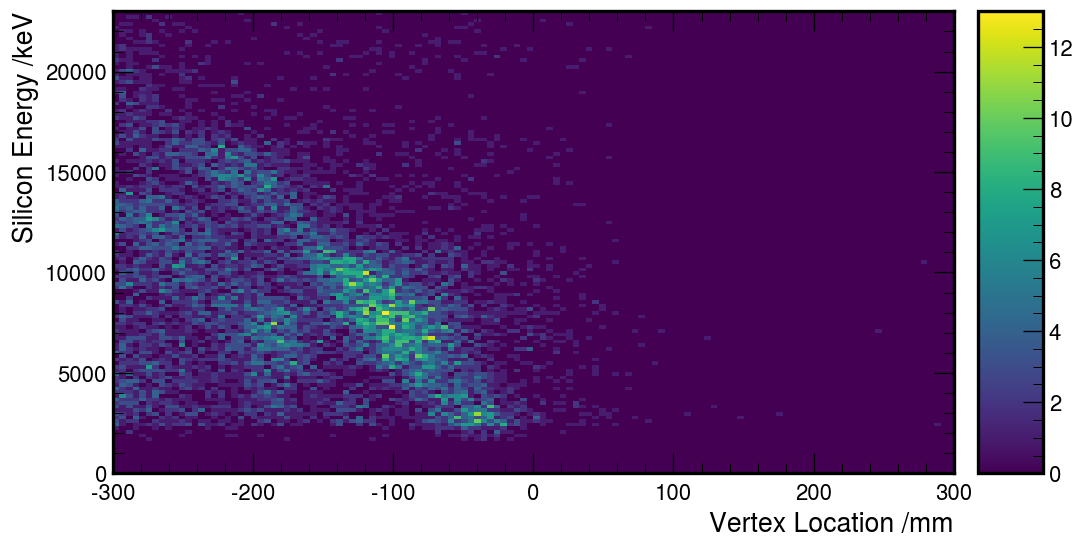

In [54]:
with open("data/angular-energy-vertex.pickle", "rb") as f:
    hist = pickle.load(f)

hist.plot();

This approach necessarily requires the knowledge of the interaction vertex (to identify the light particle energy) and the relative angle of the beam to the scattered ion track. If both of these cannot be determined, then there is insufficient knowledge of the system to find a solution. In the zero-degree regime, in which the light product track is close to zero degrees, it is possible to leverage the assumption of a linear reaction in order to once-again determine the beam energy (see {ref}`content:zero-degree-scattering`).

(content:zero-degree-scattering)=
## Zero-degree Scattering

In the zero-degree approximation, {eq}`angular-kinematics-recoil` simplifies to
:::{math}
p_3 = \frac{p_2\pqty{m_1 - m_2}}{2 m_2}\,.
:::
This in turn admits a relationship between the beam and scatter energies
:::{math}
:label: beam-energy-zero-degree
\frac{E_2}{E_1} = \frac{4 m_1 m_2}{\pqty{m_1+m_2}^2}\,.
:::


::::{tip}
:class: dropdown no-latex

:::{math}
E_1 &= \frac{\pqty{p_3}^2}{2m_1} + \frac{\pqty{p_2}^2}{2m_2}

&= \frac{\pqty{p_2}^2 \pqty{\frac{m_1}{m_2}-1}^2}{4\cdot 2m_1} + \frac{\pqty{p_2}^2}{2m_2}

&= \frac{\pqty{p_2}^2}{2}\bqty{\frac{\pqty{\frac{m_1}{m_2}-1}^2}{4\cdot m_1}+\frac{1}{m_2}}

&= \frac{\pqty{p_2}^2}{2}\frac{\bqty{m_2\pqty{\frac{m_1}{m_2}-1}^2+4m_1}}{4m_1 m_2}

&= \frac{\pqty{p_2}^2}{2}\frac{\bqty{\pqty{m_2-m_1}^2+4m_1m_2}}{4m_1 m_2^2}

&= \frac{\pqty{p_2}^2}{2m_2}\frac{\pqty{m_2+m_1}^2}{4m_1 m_2}

&= E_2\frac{\pqty{m_2+m_1}^2}{4m_1 m_2}
:::

::::

With this relationship, the beam energy is uniquely determined for elastic scattering by the energy of the light ion at the reaction vertex. As discussed above, the zero-degree reconstruction is useful in the event that one cannot easily identify the reaction vertex. If the beam energy is approximately known, it is possible to identify the vertex at the intersection between the curves that describe the beam energy as reconstructed from the initial beam energy and the energy deposited in the silicon detectors. See {numref}`zero-degree-energy-curve` for a plot of the vertex position as a function of silicon energy as reconstructed by this method.

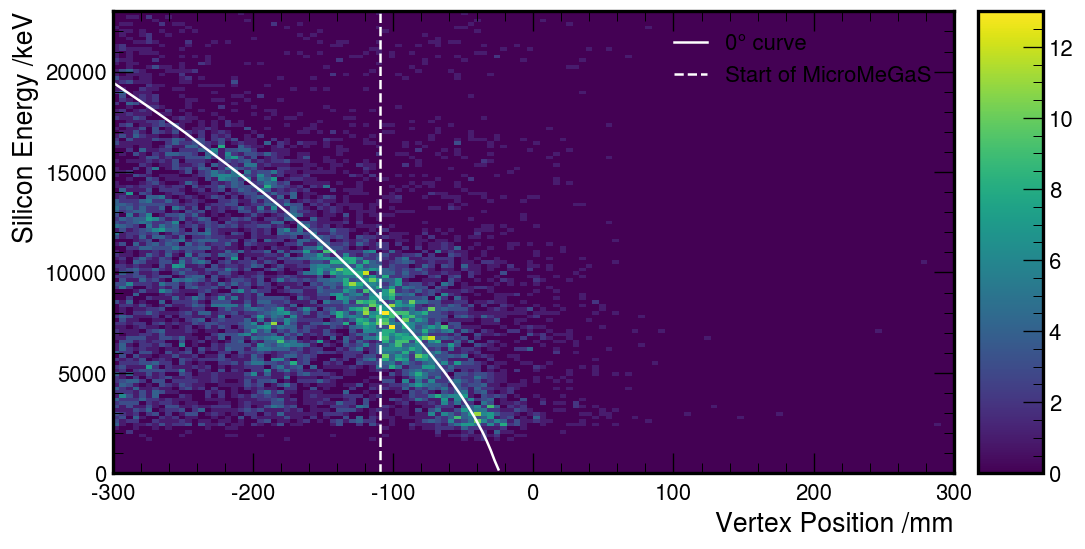

In [58]:
energy_hit, y_sample = np.loadtxt(
    "data/zero-degree-energy-vertex-map.csv", delimiter=",", unpack=True
)

plt.plot(y_sample, energy_hit, color="white", label="0° curve")
plt.xlabel("Vertex Position /mm")
plt.ylabel("Silicon Energy /keV")
plt.axvline(
    -64 * PAD_HEIGHT, label="Start of MicroMeGaS", linestyle="--", color="white"
)
hist.plot()
plt.legend();

## Excitation Functions

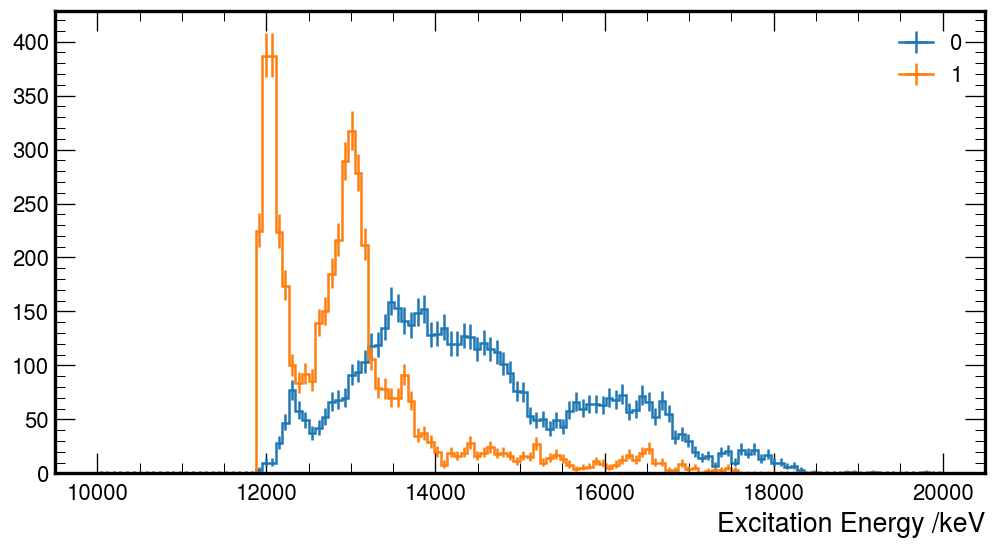

In [80]:
with open("data/excitation-function.pickle", "rb") as f:
    excitation_hist = pickle.load(f)

excitation_hist.stack(0).plot();
plt.legend();

In [70]:
carbon_10 = Particle.from_nucleus_info(a=10, z=6)
helium_4 = Particle.from_nucleus_info(a=4, z=2)
hydrogen_1 = Particle.from_nucleus_info(a=1, z=1)
oxygen_14 = Particle.from_nucleus_info(a=14, z=8)

Q = ((carbon_10.mass + helium_4.mass - oxygen_14.mass) * u.MeV / u.c**2) * u.c**2

The calculation of a reaction Q-value is described in {ref}`content:conservation-rules`. For elastic scattering of {math}`{}^{10}\mathrm{C}` ions upon a {math}`{}^4\mathrm{He}` target, the Q-value is {eval}`Q.to("keV")`. This value is used to build the elastic non-zero-degree excitation function shown in {numref}`angular-excitation-curve`, which is given by {math}`E_\mathrm{ex} = E_1 - E_\mathrm{CoM} + Q = E_1\frac{m_2}{m_1+m_2} + Q`.